# Подключение библиотек

In [30]:
import pandas as pd
from sklearn.cluster import MeanShift, AgglomerativeClustering, AffinityPropagation
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from yellowbrick.cluster import KElbowVisualizer

# Чтение данных из файла

In [20]:
pd.set_option('display.max_columns', None)
data = pd.read_parquet(r'data18.parquet')

In [21]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label
84672,0,tcp,http,SF,200,563,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,10,0.0,0.0,0.0,0.0,1.0,0.0,0.3,8,255,1.00,0.00,0.12,0.03,0.0,0.02,0.0,0.0,normal.
104569,0,tcp,http,SF,167,1578,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,255,1.00,0.00,0.50,0.08,0.0,0.00,0.0,0.0,normal.
147646,0,tcp,smtp,SF,2030,332,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,144,170,0.71,0.05,0.01,0.01,0.0,0.00,0.0,0.0,normal.
37376,0,tcp,http,SF,339,2037,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,56,255,1.00,0.00,0.02,0.04,0.0,0.00,0.0,0.0,normal.
4166,0,udp,domain_u,SF,44,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,22,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,215,0.84,0.01,0.00,0.00,0.0,0.00,0.0,0.0,normal.


# Выборка данных

In [22]:
X = pd.get_dummies(data, columns=['protocol_type', 'service', 'flag', 'Label'], prefix='OHE')

# Функция для получения метрик

In [37]:
def get_metrics(labels):
    silhoutte = silhouette_score(X, labels)
    dbi = davies_bouldin_score(X, labels)
    chi = calinski_harabasz_score(X, labels)
    print(f"Sil: {silhoutte}\nDbi: {dbi}\nChi: {chi}\nrand: {adjusted_rand_score(data['Label'], labels)}")

# Mean Shift

In [41]:
shift = MeanShift().fit(X)
get_metrics(shift.labels_)

Sil: 0.9395376871969503
Dbi: 0.37433930603820065
Chi: 87391.69997187312
rand: 0.33226961038792596


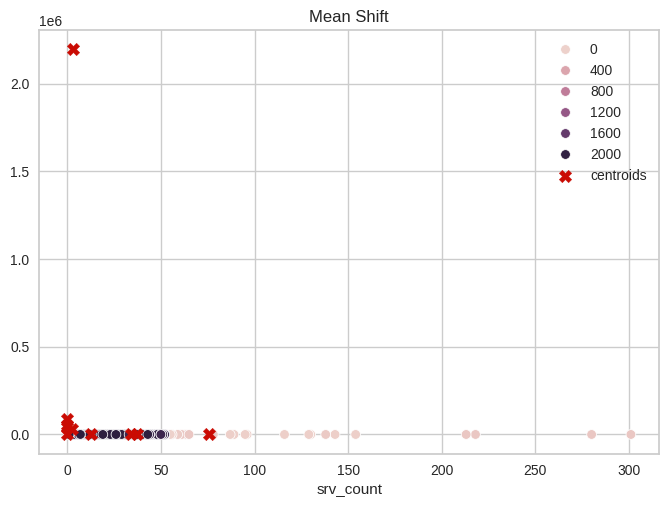

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=data, x=data['srv_count'], y=10, hue=labels)
plt.scatter(shift.cluster_centers_[:,0], shift.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.title("Mean Shift")
plt.legend()
plt.show()
plt.show()

# Agglomerative Clustering

In [42]:
clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
get_metrics(clustering.fit_predict(X))

Sil: 0.9640923291520901
Dbi: 0.13670734323129785
Chi: 131373.35781394524
rand: 0.3317146579894786


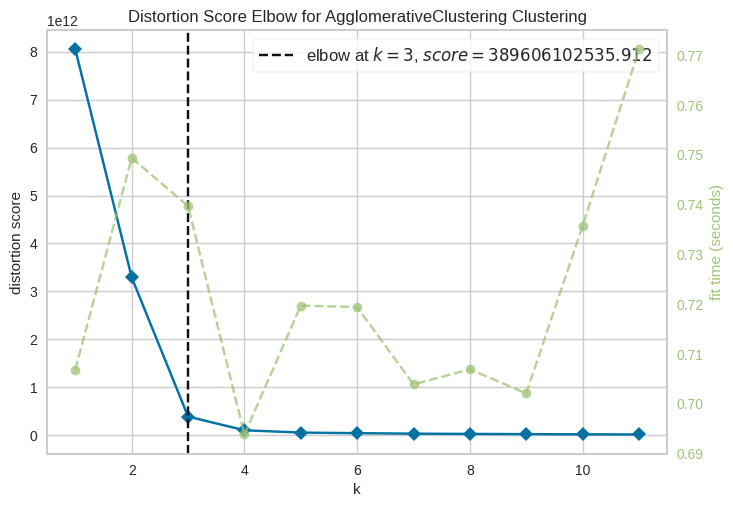

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
visualizer = KElbowVisualizer(clustering, k=(1,12)).fit(X)
visualizer.show()

# Affinity Propagation

In [43]:
propagation = AffinityPropagation(random_state=5).fit(X)
get_metrics(propagation.labels_)

/home/epilepto/Рабочий стол/SITII_LR3/env/lib/python3.10/site-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Sil: 0.3901132900790026
Dbi: 0.5535084797007068
Chi: 91747.0366914099
rand: 0.3686208461510688
